Enter disk requests (comma-separated integers): 98,183,37,122,14,124,65,67
Enter initial head position: 53
Enter disk size (max cylinder): 200

--- FCFS Algorithm ---
Order of Service: [53, 98, 183, 37, 122, 14, 124, 65, 67]
Modulus Calculation Steps:  |53 - 98| + |98 - 183| + |183 - 37| + |37 - 122| + |122 - 14| + |14 - 124| + |124 - 65| + |65 - 67|
Total Seek Time: 640




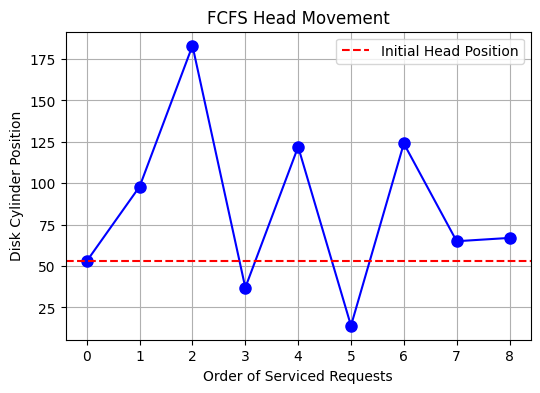




--- SSTF Algorithm ---
Order of Service: [53, 65, 67, 37, 14, 98, 122, 124, 183]
Modulus Calculation Steps:  |53 - 65| + |65 - 67| + |67 - 37| + |37 - 14| + |14 - 98| + |98 - 122| + |122 - 124| + |124 - 183|
Total Seek Time: 236




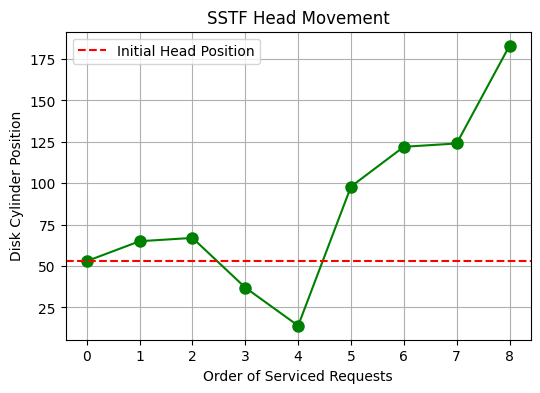




--- SCAN Algorithm ---
Order of Service: [53, 65, 67, 98, 122, 124, 183, 37, 14]
Modulus Calculation Steps:  |53 - 65| + |65 - 67| + |67 - 98| + |98 - 122| + |122 - 124| + |124 - 183| + |183 - 37| + |37 - 14|
Total Seek Time: 299




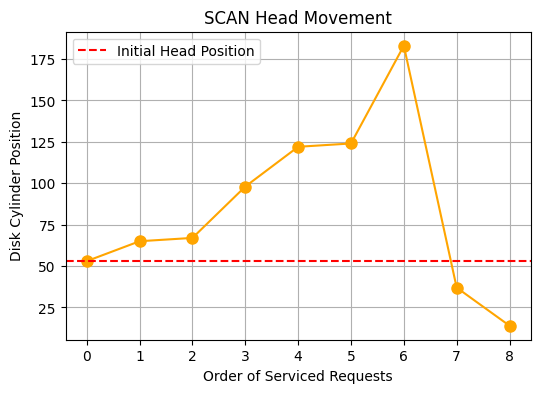




--- C-SCAN Algorithm ---
Order of Service: [53, 65, 67, 98, 122, 124, 183, 199, 0, 14, 37]
Modulus Calculation Steps:  |53 - 65| + |65 - 67| + |67 - 98| + |98 - 122| + |122 - 124| + |124 - 183| + |183 - 199| + |199 - 0| + |0 - 14| + |14 - 37|
Total Seek Time: 382




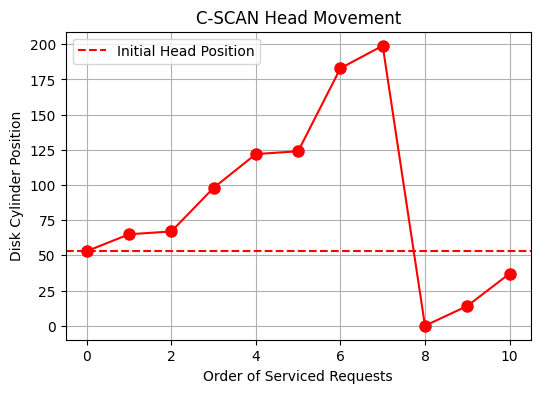




Comparison of Disk Scheduling Algorithms:
Algorithm  Total Seek Time                                        Order of Service
     FCFS              640           53 → 98 → 183 → 37 → 122 → 14 → 124 → 65 → 67
     SSTF              236           53 → 65 → 67 → 37 → 14 → 98 → 122 → 124 → 183
     SCAN              299           53 → 65 → 67 → 98 → 122 → 124 → 183 → 37 → 14
   C-SCAN              382 53 → 65 → 67 → 98 → 122 → 124 → 183 → 199 → 0 → 14 → 37

--- Comparison of Total Seek Time of  Disk Scheduling Algorithms ---



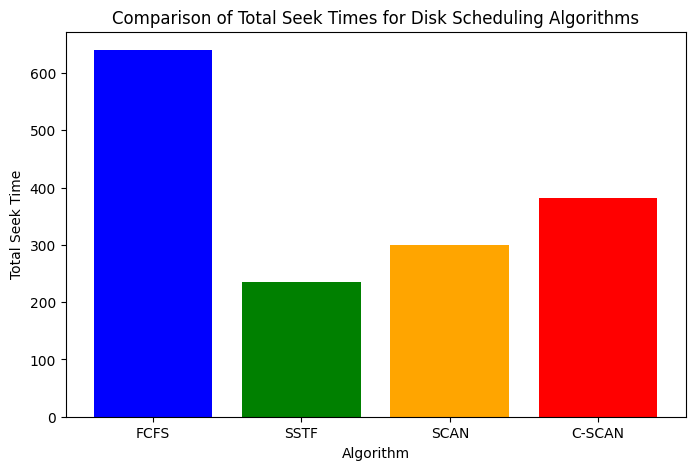

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot head movements
def plot_head_movements(title, head_movements, color):
    plt.figure(figsize=(6, 4))  # Consistent figure size
    plt.plot(head_movements, color=color, marker='o', linestyle='-', markersize=8)
    plt.title(title)
    plt.xlabel("Order of Serviced Requests")
    plt.ylabel("Disk Cylinder Position")
    plt.axhline(y=head_movements[0], color='red', linestyle='--', label='Initial Head Position')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    print("\n")  # Line space between plots for clean look

# Function to plot seek time comparison bar chart
def plot_seek_time_comparison(algorithms, seek_times):
    plt.figure(figsize=(8, 5))
    plt.bar(algorithms, seek_times, color=['blue', 'green', 'orange', 'red'])
    plt.title('Comparison of Total Seek Times for Disk Scheduling Algorithms')
    plt.xlabel('Algorithm')
    plt.ylabel('Total Seek Time')
    plt.xticks(rotation=0)  # Horizontal x-axis labels
    plt.show()

# Function for FCFS scheduling
def fcfs(disk_requests, initial_head):
    head_movements = [initial_head] + disk_requests
    seek_time_steps = [abs(head_movements[i + 1] - head_movements[i]) for i in range(len(head_movements) - 1)]
    total_seek_time = sum(seek_time_steps)

    # Calculation steps for FCFS
    calculation_steps = [
        f"|{head_movements[i]} - {head_movements[i + 1]}|"
        for i in range(len(head_movements) - 1)
    ]
    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Function for SSTF scheduling
def sstf(disk_requests, initial_head):
    requests = disk_requests[:]
    head_movements = [initial_head]
    current_head = initial_head
    seek_time_steps = []
    calculation_steps = []

    while requests:
        closest_request = min(requests, key=lambda x: abs(current_head - x))
        step = abs(current_head - closest_request)
        seek_time_steps.append(step)
        calculation_steps.append(f"|{current_head} - {closest_request}|")
        head_movements.append(closest_request)
        current_head = closest_request
        requests.remove(closest_request)

    total_seek_time = sum(seek_time_steps)
    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Function for SCAN scheduling
def scan(disk_requests, initial_head, disk_size):
    requests = sorted(disk_requests)
    head_movements = [initial_head]
    total_seek_time = 0
    seek_time_steps = []
    calculation_steps = []

    left_requests = [req for req in requests if req < initial_head]
    right_requests = [req for req in requests if req >= initial_head]

    # Move to the right first
    if right_requests:
        for req in right_requests:
            step = abs(head_movements[-1] - req) if head_movements else abs(initial_head - req)
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {req}|")
            total_seek_time += step
            head_movements.append(req)

    # Now service requests on the left side
    if left_requests:
        # Move to the last left request
        if head_movements:  # Check if we moved right first
            step = abs(head_movements[-1] - left_requests[-1])
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {left_requests[-1]}|")
            total_seek_time += step
            head_movements.append(left_requests[-1])

        # Now service the remaining requests on the left
        for req in reversed(left_requests[:-1]):  # Skip the last one as it's already added
            step = abs(head_movements[-1] - req)
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {req}|")
            total_seek_time += step
            head_movements.append(req)

    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Function for C-SCAN scheduling
def cscan(disk_requests, initial_head, disk_size):
    requests = sorted(disk_requests)
    head_movements = [initial_head]
    total_seek_time = 0
    seek_time_steps = []
    calculation_steps = []

    left_requests = [req for req in requests if req < initial_head]
    right_requests = [req for req in requests if req >= initial_head]

    # Move to the right first
    if right_requests:
        for req in right_requests:
            step = abs(head_movements[-1] - req) if head_movements else abs(initial_head - req)
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {req}|")
            total_seek_time += step
            head_movements.append(req)

        # Jump to the end of the disk
        step = abs(head_movements[-1] - (disk_size - 1))  # Move to the end of the disk
        seek_time_steps.append(step)
        calculation_steps.append(f"|{head_movements[-1]} - {(disk_size - 1)}|")
        total_seek_time += step
        head_movements.append(disk_size - 1)

    # Jump to the beginning (cylinder 0)
    jump_step = abs(head_movements[-1] - 0)  # Jump to the beginning
    seek_time_steps.append(jump_step)
    calculation_steps.append(f"|{head_movements[-1]} - 0|")
    total_seek_time += jump_step
    head_movements.append(0)

    # Now service the remaining requests on the left
    for req in left_requests:
        step = abs(head_movements[-1] - req)
        seek_time_steps.append(step)
        calculation_steps.append(f"|{head_movements[-1]} - {req}|")
        total_seek_time += step
        head_movements.append(req)

    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Main function to get user input and run algorithms
def main():
    # Get inputs from the user
    disk_requests = list(map(int, input("Enter disk requests (comma-separated integers): ").split(',')))
    initial_head = int(input("Enter initial head position: "))
    disk_size = int(input("Enter disk size (max cylinder): "))

    # FCFS
    print("\n--- FCFS Algorithm ---")
    fcfs_movements, fcfs_seek_time, fcfs_mod_steps = fcfs(disk_requests, initial_head)
    print(f"Order of Service: {fcfs_movements}")
    print("Modulus Calculation Steps: ", fcfs_mod_steps)
    print(f"Total Seek Time: {fcfs_seek_time}")
    print("\n")
    plot_head_movements("FCFS Head Movement", fcfs_movements, "blue")

    # SSTF
    print("\n--- SSTF Algorithm ---")
    sstf_movements, sstf_seek_time, sstf_mod_steps = sstf(disk_requests, initial_head)
    print(f"Order of Service: {sstf_movements}")
    print("Modulus Calculation Steps: ", sstf_mod_steps)
    print(f"Total Seek Time: {sstf_seek_time}")
    print("\n")
    plot_head_movements("SSTF Head Movement", sstf_movements, "green")

    # SCAN
    print("\n--- SCAN Algorithm ---")
    scan_movements, scan_seek_time, scan_mod_steps = scan(disk_requests, initial_head, disk_size)
    print(f"Order of Service: {scan_movements}")
    print("Modulus Calculation Steps: ", scan_mod_steps)
    print(f"Total Seek Time: {scan_seek_time}")
    print("\n")
    plot_head_movements("SCAN Head Movement", scan_movements, "orange")

    # C-SCAN
    print("\n--- C-SCAN Algorithm ---")
    cscan_movements, cscan_seek_time, cscan_mod_steps = cscan(disk_requests, initial_head, disk_size)
    print(f"Order of Service: {cscan_movements}")
    print("Modulus Calculation Steps: ", cscan_mod_steps)
    print(f"Total Seek Time: {cscan_seek_time}")
    print("\n")
    plot_head_movements("C-SCAN Head Movement", cscan_movements, "red")

    # Comparison of Algorithms
    comparison_data = {
        'Algorithm': ['FCFS', 'SSTF', 'SCAN', 'C-SCAN'],
        'Total Seek Time': [fcfs_seek_time, sstf_seek_time, scan_seek_time, cscan_seek_time],
        'Order of Service': [
            ' → '.join(map(str, fcfs_movements)),
            ' → '.join(map(str, sstf_movements)),
            ' → '.join(map(str, scan_movements)),
            ' → '.join(map(str, cscan_movements)),
        ]
    }

    comparison_df = pd.DataFrame(comparison_data)
    print("\nComparison of Disk Scheduling Algorithms:")
    print(comparison_df.to_string(index=False))

    print("\n--- Comparison of Total Seek Time of  Disk Scheduling Algorithms ---\n")

    # Plot Seek Time Comparison Bar Chart
    plot_seek_time_comparison(comparison_df['Algorithm'], comparison_df['Total Seek Time'])

if __name__ == "__main__":
    main()

Enter disk requests (comma-separated integers): 40, 180, 10, 50, 150, 5, 90, 20
Enter initial head position: 50
Enter disk size (max cylinder): 200

--- FCFS Algorithm ---
Order of Service: [50, 40, 180, 10, 50, 150, 5, 90, 20]
Modulus Calculation Steps:  |50 - 40| + |40 - 180| + |180 - 10| + |10 - 50| + |50 - 150| + |150 - 5| + |5 - 90| + |90 - 20|
Total Seek Time: 760




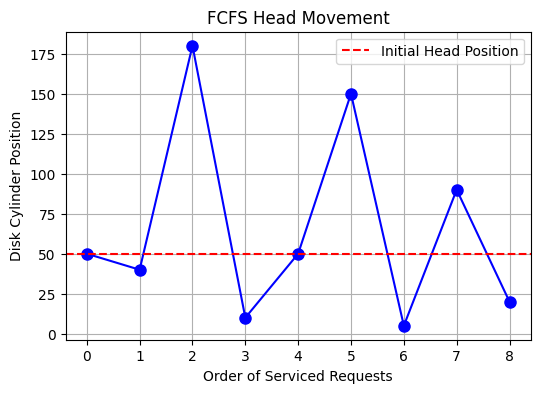




--- SSTF Algorithm ---
Order of Service: [50, 50, 40, 20, 10, 5, 90, 150, 180]
Modulus Calculation Steps:  |50 - 50| + |50 - 40| + |40 - 20| + |20 - 10| + |10 - 5| + |5 - 90| + |90 - 150| + |150 - 180|
Total Seek Time: 220




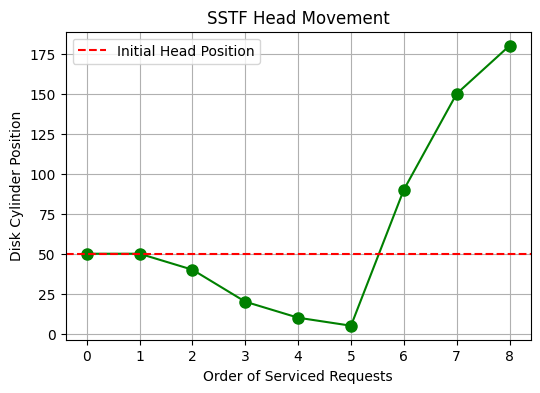




--- SCAN Algorithm ---
Order of Service: [50, 50, 90, 150, 180, 40, 20, 10, 5]
Modulus Calculation Steps:  |50 - 50| + |50 - 90| + |90 - 150| + |150 - 180| + |180 - 40| + |40 - 20| + |20 - 10| + |10 - 5|
Total Seek Time: 305




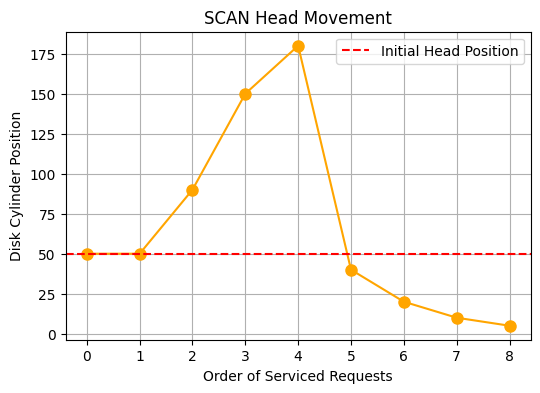




--- C-SCAN Algorithm ---
Order of Service: [50, 50, 90, 150, 180, 199, 0, 5, 10, 20, 40]
Modulus Calculation Steps:  |50 - 50| + |50 - 90| + |90 - 150| + |150 - 180| + |180 - 199| + |199 - 0| + |0 - 5| + |5 - 10| + |10 - 20| + |20 - 40|
Total Seek Time: 388




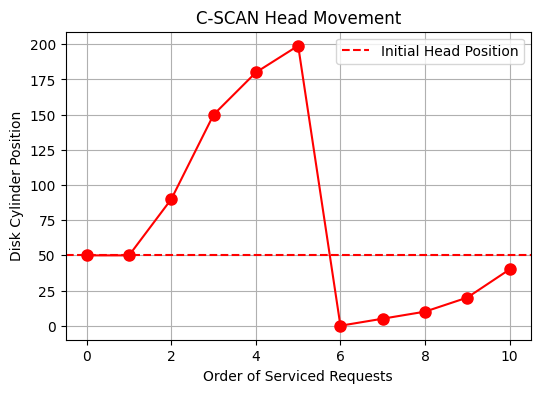




Comparison of Disk Scheduling Algorithms:
Algorithm  Total Seek Time                                      Order of Service
     FCFS              760           50 → 40 → 180 → 10 → 50 → 150 → 5 → 90 → 20
     SSTF              220           50 → 50 → 40 → 20 → 10 → 5 → 90 → 150 → 180
     SCAN              305           50 → 50 → 90 → 150 → 180 → 40 → 20 → 10 → 5
   C-SCAN              388 50 → 50 → 90 → 150 → 180 → 199 → 0 → 5 → 10 → 20 → 40

--- Comparison of Total Seek Time of  Disk Scheduling Algorithms ---



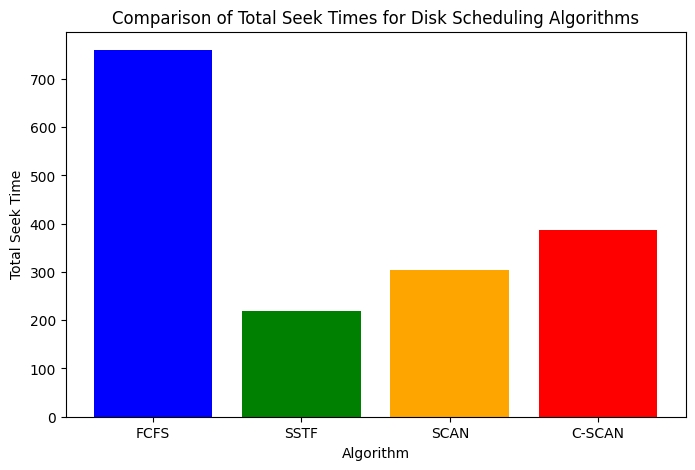

In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# Function to plot head movements
def plot_head_movements(title, head_movements, color):
    plt.figure(figsize=(6, 4))  # Consistent figure size
    plt.plot(head_movements, color=color, marker='o', linestyle='-', markersize=8)
    plt.title(title)
    plt.xlabel("Order of Serviced Requests")
    plt.ylabel("Disk Cylinder Position")
    plt.axhline(y=head_movements[0], color='red', linestyle='--', label='Initial Head Position')
    plt.legend(loc='best')
    plt.grid(True)
    plt.show()
    print("\n")  # Line space between plots for clean look

# Function to plot seek time comparison bar chart
def plot_seek_time_comparison(algorithms, seek_times):
    plt.figure(figsize=(8, 5))
    plt.bar(algorithms, seek_times, color=['blue', 'green', 'orange', 'red'])
    plt.title('Comparison of Total Seek Times for Disk Scheduling Algorithms')
    plt.xlabel('Algorithm')
    plt.ylabel('Total Seek Time')
    plt.xticks(rotation=0)  # Horizontal x-axis labels
    plt.show()

# Function for FCFS scheduling
def fcfs(disk_requests, initial_head):
    head_movements = [initial_head] + disk_requests
    seek_time_steps = [abs(head_movements[i + 1] - head_movements[i]) for i in range(len(head_movements) - 1)]
    total_seek_time = sum(seek_time_steps)

    # Calculation steps for FCFS
    calculation_steps = [
        f"|{head_movements[i]} - {head_movements[i + 1]}|"
        for i in range(len(head_movements) - 1)
    ]
    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Function for SSTF scheduling
def sstf(disk_requests, initial_head):
    requests = disk_requests[:]
    head_movements = [initial_head]
    current_head = initial_head
    seek_time_steps = []
    calculation_steps = []

    while requests:
        closest_request = min(requests, key=lambda x: abs(current_head - x))
        step = abs(current_head - closest_request)
        seek_time_steps.append(step)
        calculation_steps.append(f"|{current_head} - {closest_request}|")
        head_movements.append(closest_request)
        current_head = closest_request
        requests.remove(closest_request)

    total_seek_time = sum(seek_time_steps)
    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Function for SCAN scheduling
def scan(disk_requests, initial_head, disk_size):
    requests = sorted(disk_requests)
    head_movements = [initial_head]
    total_seek_time = 0
    seek_time_steps = []
    calculation_steps = []

    left_requests = [req for req in requests if req < initial_head]
    right_requests = [req for req in requests if req >= initial_head]

    # Move to the right first
    if right_requests:
        for req in right_requests:
            step = abs(head_movements[-1] - req) if head_movements else abs(initial_head - req)
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {req}|")
            total_seek_time += step
            head_movements.append(req)

    # Now service requests on the left side
    if left_requests:
        # Move to the last left request
        if head_movements:  # Check if we moved right first
            step = abs(head_movements[-1] - left_requests[-1])
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {left_requests[-1]}|")
            total_seek_time += step
            head_movements.append(left_requests[-1])

        # Now service the remaining requests on the left
        for req in reversed(left_requests[:-1]):  # Skip the last one as it's already added
            step = abs(head_movements[-1] - req)
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {req}|")
            total_seek_time += step
            head_movements.append(req)

    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Function for C-SCAN scheduling
def cscan(disk_requests, initial_head, disk_size):
    requests = sorted(disk_requests)
    head_movements = [initial_head]
    total_seek_time = 0
    seek_time_steps = []
    calculation_steps = []

    left_requests = [req for req in requests if req < initial_head]
    right_requests = [req for req in requests if req >= initial_head]

    # Move to the right first
    if right_requests:
        for req in right_requests:
            step = abs(head_movements[-1] - req) if head_movements else abs(initial_head - req)
            seek_time_steps.append(step)
            calculation_steps.append(f"|{head_movements[-1]} - {req}|")
            total_seek_time += step
            head_movements.append(req)

        # Jump to the end of the disk
        step = abs(head_movements[-1] - (disk_size - 1))  # Move to the end of the disk
        seek_time_steps.append(step)
        calculation_steps.append(f"|{head_movements[-1]} - {(disk_size - 1)}|")
        total_seek_time += step
        head_movements.append(disk_size - 1)

    # Jump to the beginning (cylinder 0)
    jump_step = abs(head_movements[-1] - 0)  # Jump to the beginning
    seek_time_steps.append(jump_step)
    calculation_steps.append(f"|{head_movements[-1]} - 0|")
    total_seek_time += jump_step
    head_movements.append(0)

    # Now service the remaining requests on the left
    for req in left_requests:
        step = abs(head_movements[-1] - req)
        seek_time_steps.append(step)
        calculation_steps.append(f"|{head_movements[-1]} - {req}|")
        total_seek_time += step
        head_movements.append(req)

    mod_steps = ' + '.join(calculation_steps)

    return head_movements, total_seek_time, mod_steps

# Main function to get user input and run algorithms
def main():
    # Get inputs from the user
    disk_requests = list(map(int, input("Enter disk requests (comma-separated integers): ").split(',')))
    initial_head = int(input("Enter initial head position: "))
    disk_size = int(input("Enter disk size (max cylinder): "))

    # FCFS
    print("\n--- FCFS Algorithm ---")
    fcfs_movements, fcfs_seek_time, fcfs_mod_steps = fcfs(disk_requests, initial_head)
    print(f"Order of Service: {fcfs_movements}")
    print("Modulus Calculation Steps: ", fcfs_mod_steps)
    print(f"Total Seek Time: {fcfs_seek_time}")
    print("\n")
    plot_head_movements("FCFS Head Movement", fcfs_movements, "blue")

    # SSTF
    print("\n--- SSTF Algorithm ---")
    sstf_movements, sstf_seek_time, sstf_mod_steps = sstf(disk_requests, initial_head)
    print(f"Order of Service: {sstf_movements}")
    print("Modulus Calculation Steps: ", sstf_mod_steps)
    print(f"Total Seek Time: {sstf_seek_time}")
    print("\n")
    plot_head_movements("SSTF Head Movement", sstf_movements, "green")

    # SCAN
    print("\n--- SCAN Algorithm ---")
    scan_movements, scan_seek_time, scan_mod_steps = scan(disk_requests, initial_head, disk_size)
    print(f"Order of Service: {scan_movements}")
    print("Modulus Calculation Steps: ", scan_mod_steps)
    print(f"Total Seek Time: {scan_seek_time}")
    print("\n")
    plot_head_movements("SCAN Head Movement", scan_movements, "orange")

    # C-SCAN
    print("\n--- C-SCAN Algorithm ---")
    cscan_movements, cscan_seek_time, cscan_mod_steps = cscan(disk_requests, initial_head, disk_size)
    print(f"Order of Service: {cscan_movements}")
    print("Modulus Calculation Steps: ", cscan_mod_steps)
    print(f"Total Seek Time: {cscan_seek_time}")
    print("\n")
    plot_head_movements("C-SCAN Head Movement", cscan_movements, "red")

    # Comparison of Algorithms
    comparison_data = {
        'Algorithm': ['FCFS', 'SSTF', 'SCAN', 'C-SCAN'],
        'Total Seek Time': [fcfs_seek_time, sstf_seek_time, scan_seek_time, cscan_seek_time],
        'Order of Service': [
            ' → '.join(map(str, fcfs_movements)),
            ' → '.join(map(str, sstf_movements)),
            ' → '.join(map(str, scan_movements)),
            ' → '.join(map(str, cscan_movements)),
        ]
    }

    comparison_df = pd.DataFrame(comparison_data)
    print("\nComparison of Disk Scheduling Algorithms:")
    print(comparison_df.to_string(index=False))

    print("\n--- Comparison of Total Seek Time of  Disk Scheduling Algorithms ---\n")

    # Plot Seek Time Comparison Bar Chart
    plot_seek_time_comparison(comparison_df['Algorithm'], comparison_df['Total Seek Time'])

if __name__ == "__main__":
    main()